## Linear Regression Assignment

#### Bike-sharing platform : BoomBikes
- Build the model to find the demand of shared bikes which will be used by the management to understand exact demands vary with different features. 
- Management can decide the business strategy to meet the demand levels & customer's expectations and to understand the demand dynamics of a new market.

#### Steps to build the regression model
1. read and understand the data
2. preparing the data (using train-test-split and scaling)
3. Train the model
4. Residual analysis
5. Preidictions and Evaluate the model

## Read and understand the Data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data = pd.read_csv('day.csv')

In [3]:
bike_data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  feeltemp    730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


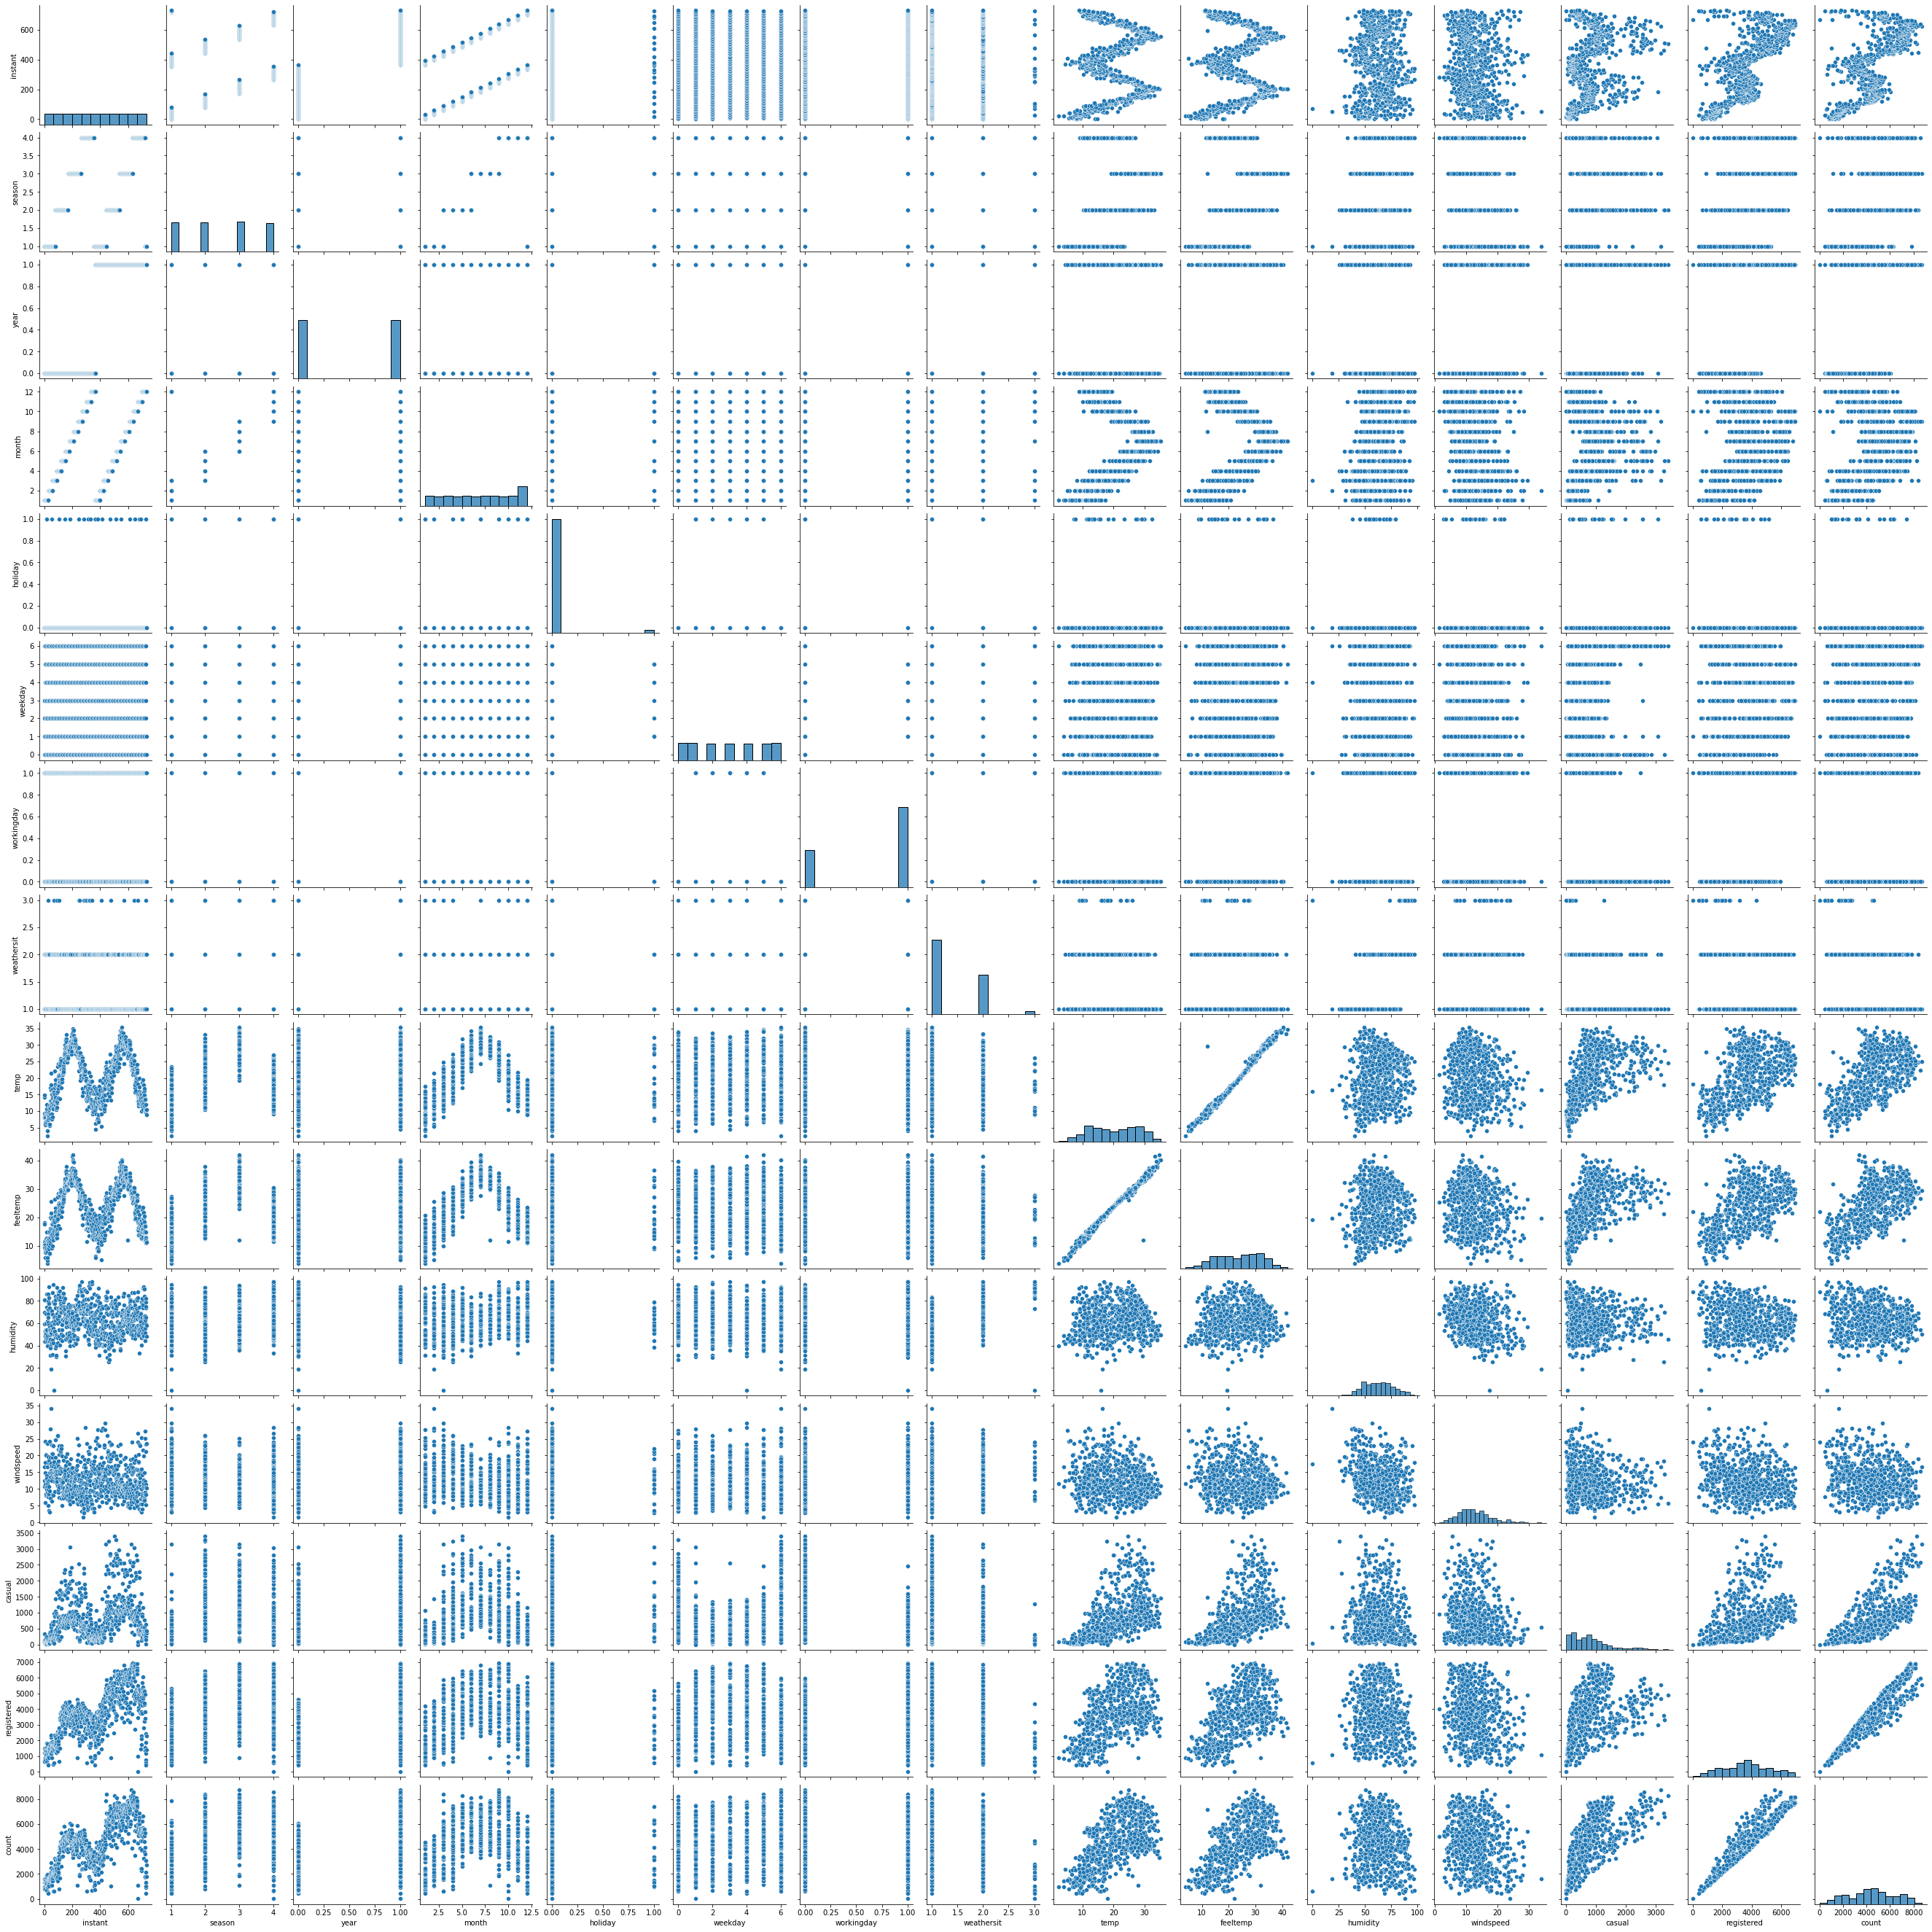

In [7]:
#sns.pairplot(bike_data)
#plt.show()

## Prepare the data
- Encoding
    - Other variables to dummy variables
- Splitting into train and test
- Rescalling of variables

In [8]:
# convert 'weathersit' to dummy variables
weather_detail = pd.get_dummies(bike_data['weathersit'], drop_first = True)
weather_detail.rename(columns = {1: 'clear', 2: 'mist', 3 : 'lightsnow', 4 : 'heavyrain'}, inplace = True)

In [9]:
bike_data = pd.concat([bike_data, weather_detail], axis = 1)

In [10]:
#dropping the 'weathersit' variable from dataset since it's already converted as dummy variable
bike_data = bike_data.drop('weathersit', axis = 1)

In [11]:
# convert 'season' to dummy variables
season_detail = pd.get_dummies(bike_data['season'], drop_first = True)
season_detail.rename(columns = {1: 'spring', 2: 'summer', 3 : 'fall', 4 : 'winter'}, inplace = True)

In [12]:
bike_data = pd.concat([bike_data, season_detail], axis = 1)

In [13]:
#dropping the 'season' variable from dataset since it's already converted as dummy variable
bike_data = bike_data.drop('season', axis = 1)

In [14]:
#dropping the 'date' variable from dataset since this variable is captured in year and month like dummy variable
bike_data = bike_data.drop('date', axis = 1)

In [15]:
#dropping the 'instant' variable from dataset since this index variable is not having bike sharing
bike_data = bike_data.drop('instant', axis = 1)

In [16]:
#dropping the 'casual', 'registered' variable from dataset since these varaiables is taken acount in count
bike_data = bike_data.drop('casual', axis = 1)
bike_data = bike_data.drop('registered', axis = 1)

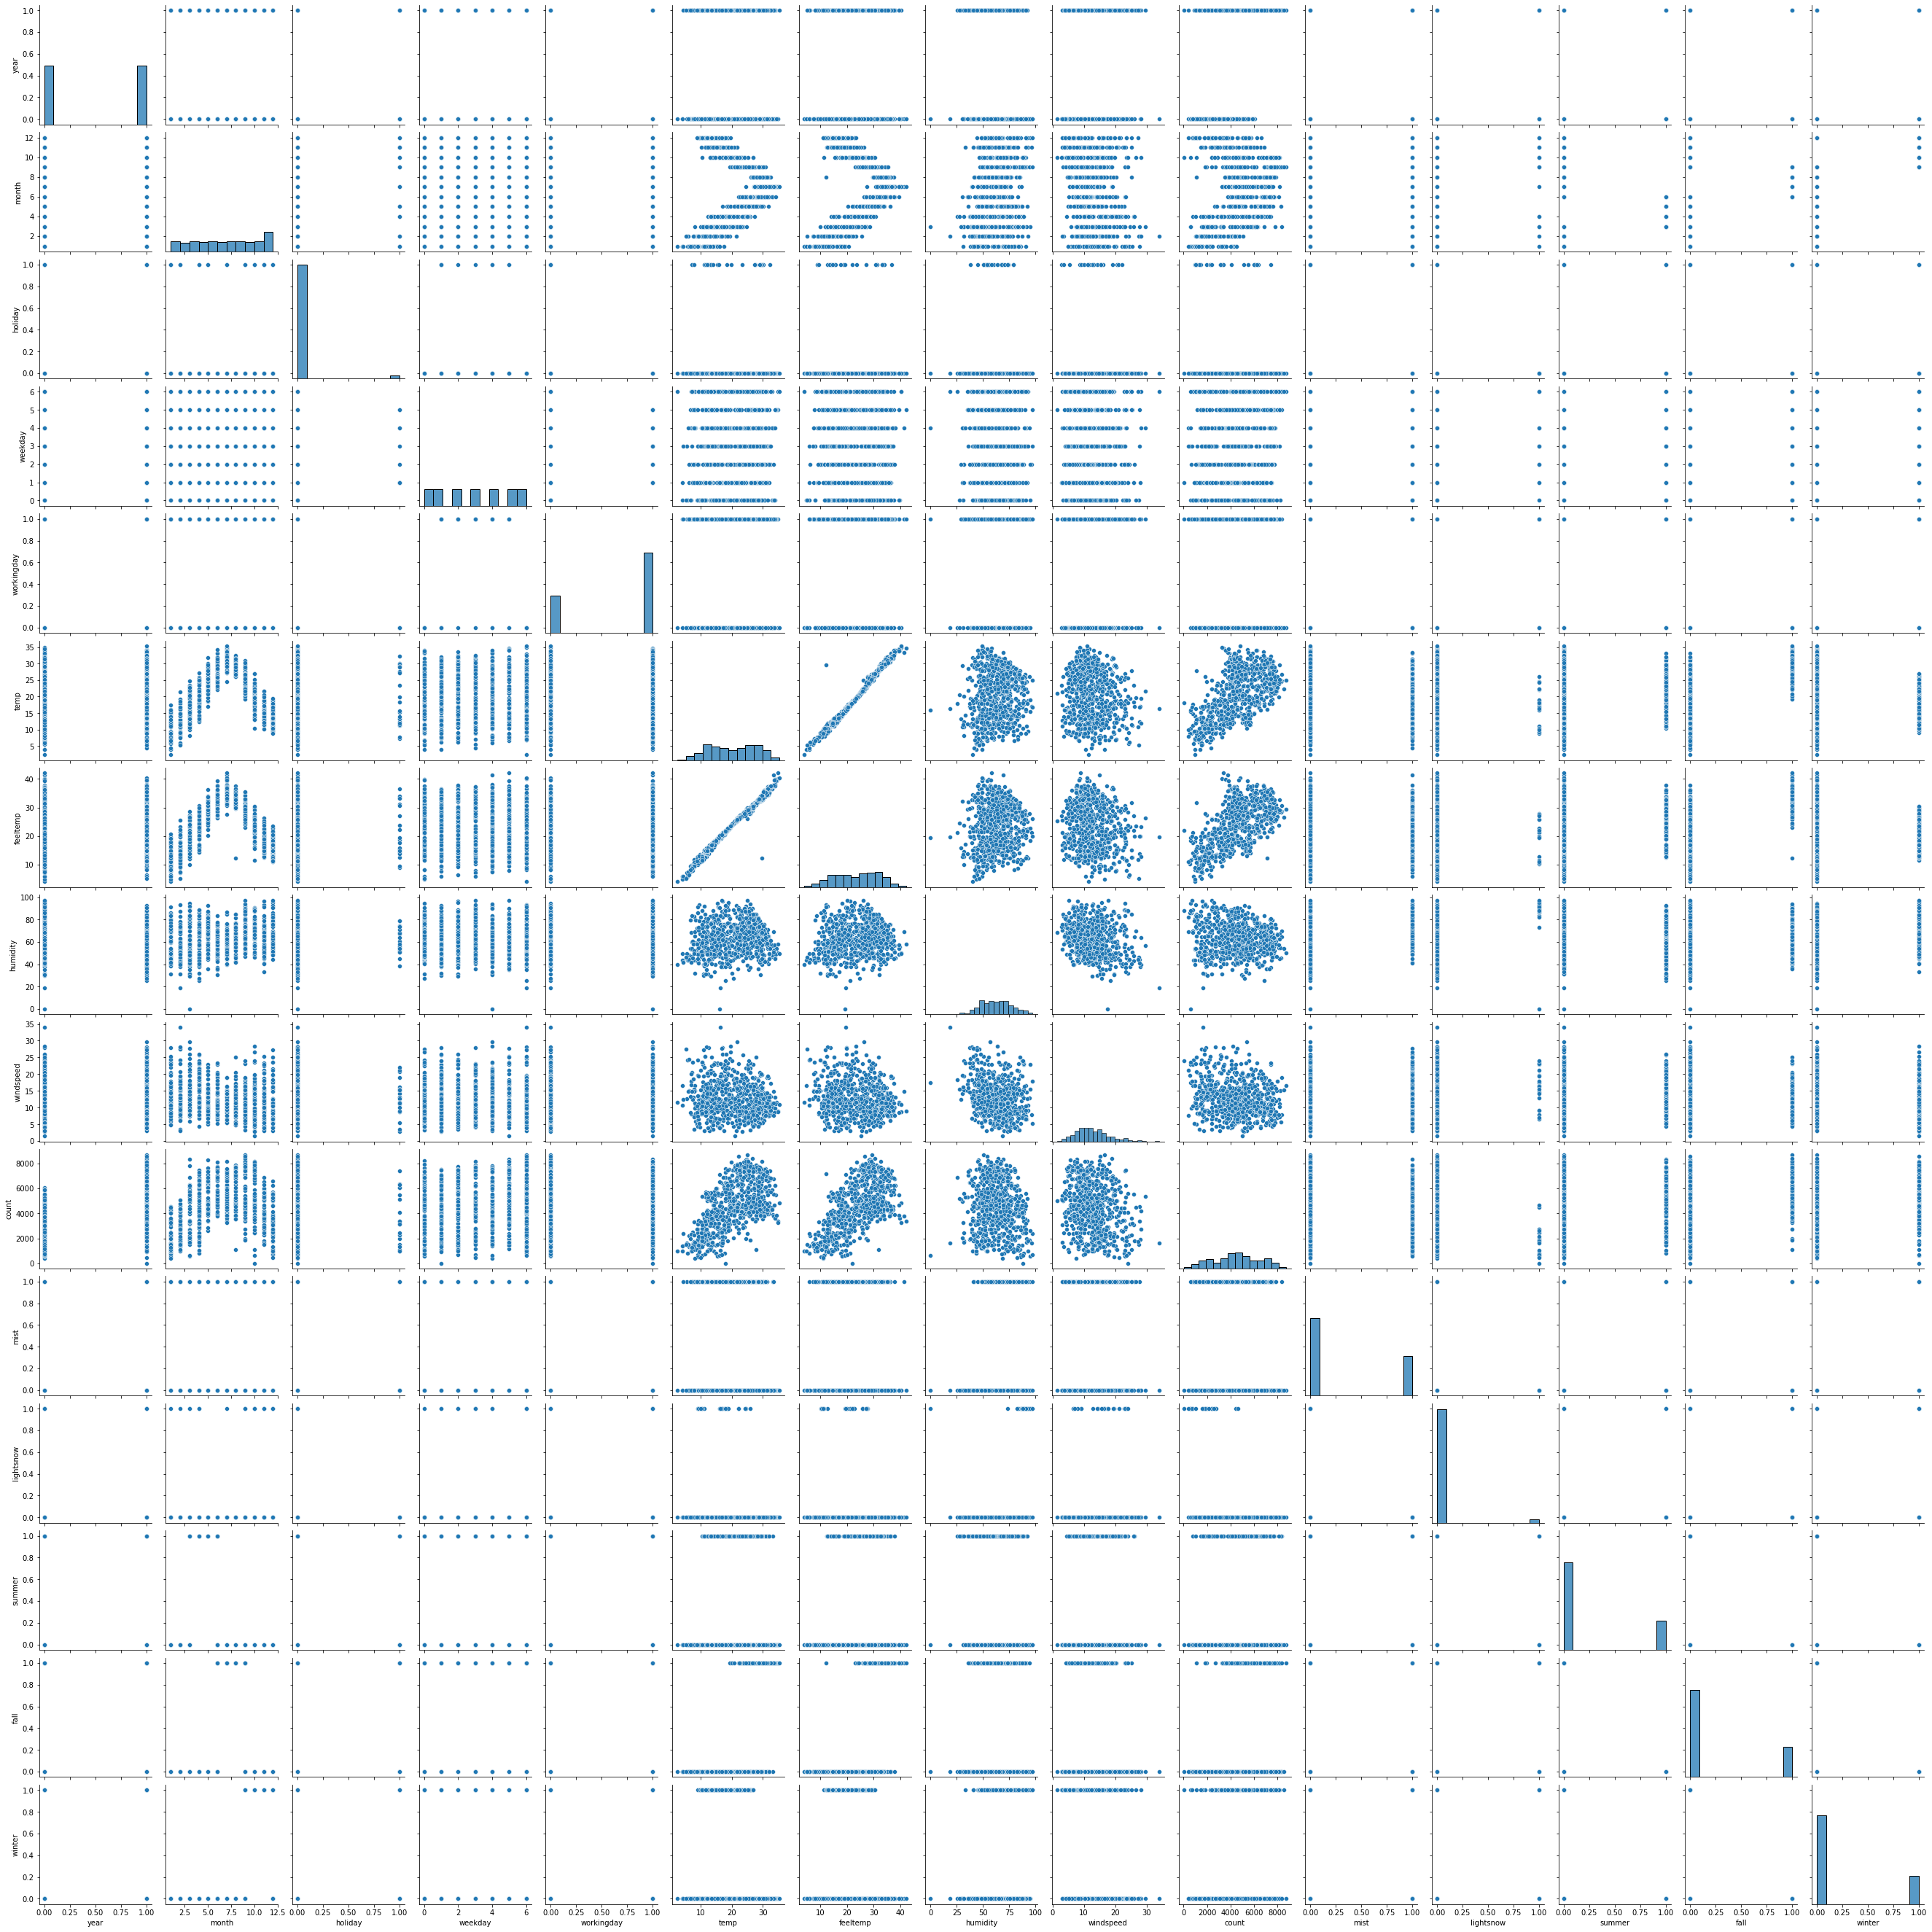

In [17]:
sns.pairplot(bike_data)
plt.show()

### Split the dataset

In [18]:
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)
print (df_train.shape)
print (df_test.shape)

(510, 15)
(220, 15)


### Rescaling the features
- We use MinMax Scaling (normalization): Between 0 and 1

In [19]:
numr_vars = ['month', 'weekday', 'temp', 'feeltemp', 'humidity', 'windspeed', 'count']
df_train.head()

,year,month,holiday,weekday,workingday,temp,feeltemp,humidity,windspeed,count,mist,lightsnow,summer,fall,winter
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,1,0,0
111,0,4,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,1,0,0


In [20]:
#Instantiate the variable
scaler = MinMaxScaler()

In [21]:
df_train[numr_vars] = scaler.fit_transform(df_train[numr_vars])

### Training the model

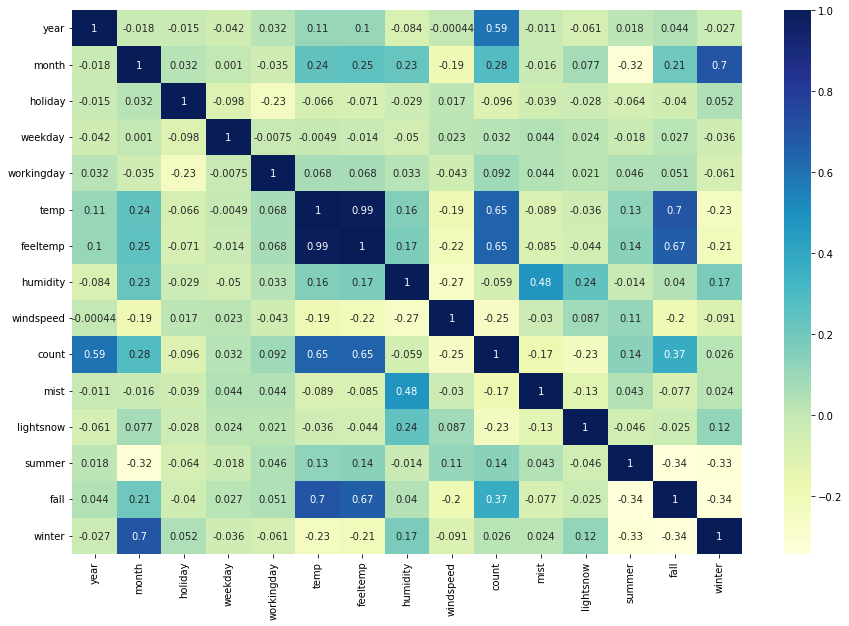

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

### Model 1 (adding 'year' variable)

In [23]:
y_train = df_train.pop('count')
X_train = df_train

In [24]:
X_train.head() 

,year,month,holiday,weekday,workingday,temp,feeltemp,humidity,windspeed,mist,lightsnow,summer,fall,winter
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1,0,1,0,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,1,0,1,0,0


In [25]:
X_train_sm = X_train['year']
X_train_sm = sm.add_constant(X_train_sm)

# add the variable 'registered' to build the model 
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.95e-49
Time:                        06:55:32   Log-Likelihood:                 148.67
No. Observations:                 510   AIC:                            -293.3
Df Residuals:                     508   BIC:                            -284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.131      0.000       0.356       0.401
year           0.2652      0.016     16.531      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 (adding 'year', 'month' variable)

In [26]:
#numr_vars2 =  ['year', 'month', 'temp', 'mist', 'lightsnow',  'summer', 'fall', 'winter']
X_train_sm = X_train[['year', 'month']]
X_train_sm = sm.add_constant(X_train_sm)

# add the variable 'registered', 'casual' to build the model 
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     196.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           7.76e-64
Time:                        06:55:32   Log-Likelihood:                 185.08
No. Observations:                 510   AIC:                            -364.2
Df Residuals:                     507   BIC:                            -351.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2720      0.016     16.865      0.000       0.240       0.304
year           0.2676      0.015     17.896      0.000       0.238       0.297
month          0.2096      0.024      8.821      0.000       0.163       0.256
==============================================================================
Omnibus:                       33.219   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.163
Skew:                          -0.624   Prob(JB):                     5.16e-09
Kurtosis:                       3.489   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
data = X_train[['year', 'month']]
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,year,1.56
1,month,1.56


### Model 3 (adding 'year', 'month', 'temp' variable)

In [28]:
X_train_sm = X_train[['year', 'month', 'temp']]
X_train_sm = sm.add_constant(X_train_sm)

# add the variable 'registered', 'casual' to build the model 
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     425.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          7.75e-138
Time:                        06:55:32   Log-Likelihood:                 359.85
No. Observations:                 510   AIC:                            -711.7
Df Residuals:                     506   BIC:                            -694.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0409      0.015      2.646      0.008       0.011       0.071
year           0.2400      0.011     22.430      0.000       0.219       0.261
month          0.1149      0.017      6.599      0.000       0.081       0.149
temp           0.5450      0.024     22.320      0.000       0.497       0.593
==============================================================================
Omnibus:                       75.067   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.313
Skew:                          -0.834   Prob(JB):                     6.23e-33
Kurtosis:                       5.048   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
data = X_train[['year', 'month', 'temp']]
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,3.95
1,month,3.25
0,year,1.90


### Model 4 (adding 'year', 'month', 'temp', 'winter' variable)

In [30]:
numr_vars2 =  ['year', 'month', 'temp', 'winter']

X_train_sm = X_train[numr_vars2]
X_train_sm = sm.add_constant(X_train_sm)

# add the variable 'registered', 'casual' to build the model 
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     333.4
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.74e-140
Time:                        06:55:32   Log-Likelihood:                 368.39
No. Observations:                 510   AIC:                            -726.8
Df Residuals:                     505   BIC:                            -705.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0304      0.015      1.975      0.049       0.000       0.061
year           0.2375      0.011     22.509      0.000       0.217       0.258
month          0.0204      0.028      0.717      0.474      -0.036       0.076
temp           0.6157      0.029     20.890      0.000       0.558       0.674
winter         0.0860      0.021      4.147      0.000       0.045       0.127
==============================================================================
Omnibus:                       85.679   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.736
Skew:                          -0.878   Prob(JB):                     7.00e-44
Kurtosis:                       5.503   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
numr_vars2 =  ['year', 'month', 'temp', 'winter']

data = X_train[numr_vars2]
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,month,10.39
2,temp,6.46
3,winter,3.78
0,year,1.92


### Model 5 (dropping 'month' variable, since this has high p-value & VIF value)

- When 'winter' variable is added, VIF for month becomes high (due to multicolinearity). So we drop the 'month' variable.


In [32]:
X_train_new = X_train.drop('month', axis = 1)

In [33]:
numr_vars2 =  ['year', 'temp', 'winter']

X_train_sm = X_train_new[numr_vars2]
X_train_sm = sm.add_constant(X_train_sm)

# add the variable 'registered', 'casual' to build the model 
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     444.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.11e-141
Time:                        06:55:32   Log-Likelihood:                 368.13
No. Observations:                 510   AIC:                            -728.3
Df Residuals:                     506   BIC:                            -711.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0315      0.015      2.052      0.041       0.001       0.062
year           0.2369      0.011     22.528      0.000       0.216       0.258
temp           0.6281      0.024     26.216      0.000       0.581       0.675
winter         0.0979      0.012      7.854      0.000       0.073       0.122
==============================================================================
Omnibus:                       84.720   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.083
Skew:                          -0.868   Prob(JB):                     1.60e-43
Kurtosis:                       5.502   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
numr_vars2 =  ['year', 'temp', 'winter']

data = X_train_new[numr_vars2]
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,1.98
0,year,1.92
2,winter,1.18


### Model 6 (adding all variables)

In [35]:
X_train_new.columns

Index(['year', 'holiday', 'weekday', 'workingday', 'temp', 'feeltemp',
       'humidity', 'windspeed', 'mist', 'lightsnow', 'summer', 'fall',
       'winter'],
      dtype='object')

In [36]:
X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.52e-183
Time:                        06:55:32   Log-Likelihood:                 495.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     496   BIC:                            -904.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1715      0.030      5.791      0.000       0.113       0.230
year           0.2320      0.008     27.719      0.000       0.216       0.248
holiday       -0.0632      0.027     -2.333      0.020      -0.116      -0.010
weekday        0.0487      0.012      3.920      0.000       0.024       0.073
workingday     0.0186      0.009      2.049      0.041       0.001       0.036
temp           0.4333      0.139      3.123      0.002       0.161       0.706
feeltemp       0.0632      0.142      0.446      0.656      -0.215       0.342
humidity      -0.1260      0.039     -3.250      0.001      -0.202      -0.050
windspeed     -0.1780      0.027     -6.590      0.000      -0.231      -0.125
mist          -0.0569      0.011     -5.246      0.000      -0.078      -0.036
lightsnow     -0.2471      0.027     -9.077      0.000      -0.301      -0.194
summer         0.1187      0.015      7.804      0.000       0.089       0.149
fall           0.0755      0.021      3.670      0.000       0.035       0.116
winter         0.1633      0.013     12.523      0.000       0.138       0.189
==============================================================================
Omnibus:                       73.717   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.521
Skew:                          -0.733   Prob(JB):                     1.91e-41
Kurtosis:                       5.584   Cond. No.                         89.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
data = X_train_new
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,temp,386.64
5,feeltemp,365.00
6,humidity,17.10
11,fall,6.57
7,windspeed,3.96
10,summer,3.38
3,workingday,3.14
2,weekday,3.01
12,winter,2.48
8,mist,2.14


### Model 7 (Final)
- since'feeltemp' has high p-value 
- Checked iteratively and found 'feeltemp', 'humidity', 'fall' gets high VIF value, so these variables are dropped.

In [38]:
#'workingday',  'holiday',  'windspeed', 'lightsnow', 'weekday', 'mist',
X_train_new2 = X_train_new.drop(['feeltemp', 'humidity', 'fall'], axis = 1)
X_train_new2.head()

,year,holiday,weekday,workingday,temp,windspeed,mist,lightsnow,summer,winter
576,1,0,0.333333,1,0.815169,0.264686,0,0,0,0
426,1,0,1.000000,0,0.442393,0.255342,1,0,0,0
728,1,0,0.000000,0,0.245101,0.663106,0,0,0,0
482,1,0,1.000000,0,0.395666,0.188475,1,0,1,0
111,0,0,0.833333,1,0.345824,0.380981,1,0,1,0


In [39]:
X_train_sm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.12e-181
Time:                        06:55:32   Log-Likelihood:                 482.26
No. Observations:                 510   AIC:                            -942.5
Df Residuals:                     499   BIC:                            -895.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0854      0.019      4.412      0.000       0.047       0.123
year           0.2331      0.008     27.444      0.000       0.216       0.250
holiday       -0.0655      0.028     -2.365      0.018      -0.120      -0.011
weekday        0.0529      0.013      4.186      0.000       0.028       0.078
workingday     0.0193      0.009      2.074      0.039       0.001       0.038
temp           0.5740      0.020     28.782      0.000       0.535       0.613
windspeed     -0.1643      0.026     -6.363      0.000      -0.215      -0.114
mist          -0.0763      0.009     -8.460      0.000      -0.094      -0.059
lightsnow     -0.2784      0.025    -10.918      0.000      -0.328      -0.228
summer         0.0764      0.010      7.322      0.000       0.056       0.097
winter         0.1290      0.011     12.043      0.000       0.108       0.150
==============================================================================
Omnibus:                       59.074   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.721
Skew:                          -0.619   Prob(JB):                     1.24e-30
Kurtosis:                       5.225   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
data = X_train_new2
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,temp,4.39
5,windspeed,3.44
3,workingday,2.94
2,weekday,2.88
0,year,2.02
6,mist,1.52
8,summer,1.51
9,winter,1.39
7,lightsnow,1.08
1,holiday,1.07


### Residual Analysis

In [41]:
y_train_pred = lr_model.predict(X_train_sm)

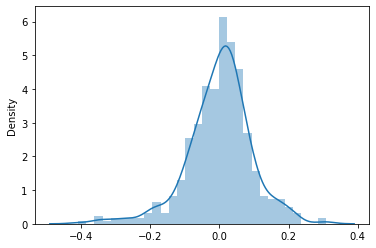

In [42]:
res = y_train - y_train_pred
sns.distplot(res, kde=True)
plt.show()

<AxesSubplot:>

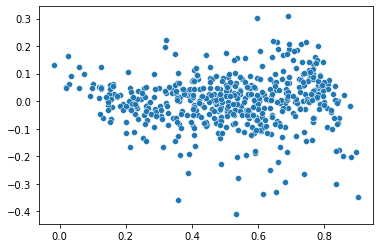

In [43]:
sns.scatterplot(y_train_pred, res)

### Predict and Evaluate the test set

In [44]:
df_test[numr_vars] = scaler.transform(df_test[numr_vars])

In [45]:
y_test = df_test.pop('count')
X_test = df_test

In [46]:
X_test_sm = sm.add_constant(X_test)

In [47]:
#, 'workingday',  'holiday',  'windspeed', 'lightsnow', 'weekday', 'mist'
X_test_sm = X_test_sm.drop(['month', 'feeltemp', 'humidity', 'fall'], axis = 1)

In [48]:
y_test_pred = lr_model.predict(X_test_sm)

In [49]:
r2_val = r2_score(y_true = y_test, y_pred = y_test_pred)

In [50]:
print(r2_val)

0.7902871878896125


## We derived few factors influencing the user to use bike sharing platform and the variables which affects the demand

- Temperature and the seasons are like winter, summer and when there is working day, week days, users has high interested to use bike sharing. It is directly proportional, these variable can be considered to attract more users for future demand.

- During holiday or when there is high windspeed or suppose the season is mist, light snow, users are not having intersted to utilise bike sharing platform. It is inverse proportion, some strategy can be formed to improve during the scenarios.



**const = 0.2331 *  _year_ +  0.574 * _temp_ + 0.129 * _winter_ -0.0655 * _holiday_ + 0.0529 * _weekday_ + 0.0193 * _workingday_ 
            -0.1643 * _windspeed_ -0.0763 * _mist_ -0.2784 * _light snow_ + 0.0764 * _summer_**